In [18]:
from torchvision import datasets

from torchvision.transforms import ToTensor

import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

train = datasets.MNIST(root = 'data', train = True, transform = ToTensor(),
                       download = True)
test = datasets.MNIST(root = 'data', train = False, transform = ToTensor())


batch_size=128
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True,
                                           num_workers=1)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=True,
                                          num_workers=1)

device = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")


n_neurons = 32

class MLPNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, n_neurons, device=device)
    self.fc2 = nn.Linear(n_neurons, n_neurons, device=device)
    self.fc3 = nn.Linear(n_neurons, n_neurons, device=device)
    self.fc4 = nn.Linear(n_neurons, 10, device=device)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.fc1(x)
    #x = F.relu(x)
    x = F.sigmoid(x)
    x = self.fc2(x)
    x = self.fc3(x)
    x = self.fc4(x)
    
    return F.log_softmax(x, dim=1)

model = MLPNet()
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optimizer = torch.optim.Adamax(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

def train(epoch, log_interval=200):
    # Set model to training mode
    model.train()

    # Loop over each batch from the training set
    for batch_idx, (data, target) in enumerate(train_loader):
        # Copy data to GPU if needed
        #data = data.to(device)
        #target = target.to(device)

        # Zero gradient buffers
        optimizer.zero_grad()

        # Pass data through the network
        output = model(data)
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct = pred.eq(target.data).cpu().sum()
        pred,target=pred.type(torch.DoubleTensor),target.type(torch.DoubleTensor)

        # Calculate loss
        loss = criterion(output, target)

        # Backpropagate
        loss.backward()

        # Update weights
        optimizer.step()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))


def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in test_loader:
        output = model(data)
        val_loss += criterion(output, target).data.item()
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    val_loss /= len(test_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(test_loader.dataset)
    accuracy_vector.append(accuracy)

    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        val_loss, correct, len(test_loader.dataset), accuracy))
    

epochs = 10

lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('validation loss')

plt.figure(figsize=(5,3))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('validation accuracy');    

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.301613
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.624153
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.678639

Validation set: Average loss: 0.2509, Accuracy: 9296/10000 (93%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.340690
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.343493
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.349041

Validation set: Average loss: 0.1938, Accuracy: 9466/10000 (95%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.255289
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.311283
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.443210

Validation set: Average loss: 0.1831, Accuracy: 9481/10000 (95%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.239574
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.195248
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.414765

Validation set: Average loss: 0.1606, Accuracy: 9545/10000 (95%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.112113
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.124496
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.351313

Valida

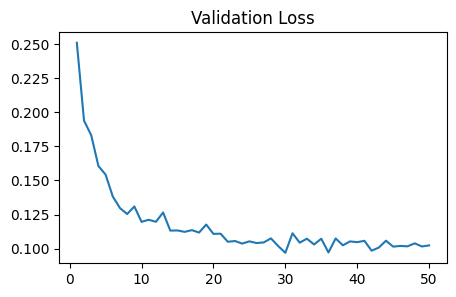

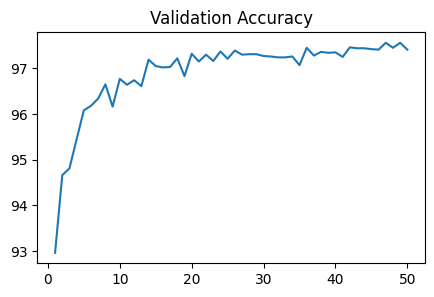

In [23]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt  # Adicionado para plotar gráficos no final

# Carregando os datasets
train = datasets.MNIST(root='data', train=True, transform=ToTensor(), download=True)
test = datasets.MNIST(root='data', train=False, transform=ToTensor())

# Definindo o batch size
batch_size = 128
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True, num_workers=1)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=True, num_workers=1)

# Definindo o dispositivo (GPU ou CPU)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Número de neurônios nas camadas ocultas
n_neurons = 64

# Definindo a arquitetura do modelo
class MLPNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, n_neurons)
        self.fc1_drop = nn.Dropout(0.2)
        self.fc2 = nn.Linear(n_neurons, n_neurons)
        self.fc3 = nn.Linear(n_neurons, n_neurons)
        self.fc3_drop = nn.Dropout(0.2)
        self.fc4 = nn.Linear(n_neurons, n_neurons)
        self.fc5 = nn.Linear(n_neurons, n_neurons)
        self.fc5_drop = nn.Dropout(0.2)
        self.fc6 = nn.Linear(n_neurons, n_neurons)
        self.fc7 = nn.Linear(n_neurons, n_neurons)
        self.fc7_drop = nn.Dropout(0.2)
        self.fc8 = nn.Linear(n_neurons, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Redimensiona a imagem de 28x28 para um vetor de 784 elementos
        x = self.fc1(x)
        x = self.fc1_drop(x)
        x = F.relu(x)  # Utilizando Sigmoid (ou troque por ReLU)
        x = self.fc2(x)
        x = F.relu(x)  # Utilizando Sigmoid (ou troque por ReLU)
        x = self.fc3(x)
        x = self.fc3_drop(x)
        x = F.relu(x)  # Utilizando Sigmoid (ou troque por ReLU)
        x = self.fc4(x)
        x = F.relu(x)  # Utilizando Sigmoid (ou troque por ReLU)
        x = self.fc5(x)
        x = self.fc5_drop(x)
        x = F.relu(x)  # Utilizando Sigmoid (ou troque por ReLU)
        x = self.fc6(x)
        x = F.relu(x)  # Utilizando Sigmoid (ou troque por ReLU)
        x = self.fc7(x)
        x = self.fc7_drop(x)
        x = F.relu(x)  # Utilizando Sigmoid (ou troque por ReLU)
        x = self.fc8(x)
        return F.log_softmax(x, dim=1)

# Criando uma instância do modelo e movendo-o para o dispositivo (GPU/CPU)
model = MLPNet().to(device)

# Definindo o otimizador e a função de perda
optimizer = torch.optim.Adamax(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Função de treinamento
def train(epoch, log_interval=200):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # Movendo os dados e o alvo para o dispositivo (GPU/CPU)
        data, target = data.to(device), target.to(device)

        # Zera os gradientes
        optimizer.zero_grad()

        # Passa os dados pela rede
        output = model(data)

        # Calcula a perda
        loss = criterion(output, target)

        # Backpropagation
        loss.backward()

        # Atualiza os pesos
        optimizer.step()

        # Exibe o progresso
        if batch_idx % log_interval == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

# Função de validação
def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    with torch.no_grad():  # Desativa o cálculo de gradientes durante a validação
        for data, target in test_loader:
            # Movendo os dados e o alvo para o dispositivo (GPU/CPU)
            data, target = data.to(device), target.to(device)

            # Passa os dados pela rede
            output = model(data)

            # Calcula a perda
            val_loss += criterion(output, target).item()

            # Obtém a previsão (classe com maior probabilidade)
            pred = output.data.max(1)[1]
            correct += pred.eq(target.data).sum().item()

    # Média da perda de validação
    val_loss /= len(test_loader)
    loss_vector.append(val_loss)

    # Calcula a acurácia
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_vector.append(accuracy)

    print(f'\nValidation set: Average loss: {val_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({accuracy:.0f}%)\n')

# Definindo o número de épocas
epochs = 50

# Listas para armazenar a perda e acurácia durante a validação
lossv, accv = [], []

# Loop de treinamento
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

# Plotando os resultados
plt.figure(figsize=(5, 3))
plt.plot(np.arange(1, epochs + 1), lossv)
plt.title('Validation Loss')

plt.figure(figsize=(5, 3))
plt.plot(np.arange(1, epochs + 1), accv)
plt.title('Validation Accuracy')
plt.show()
